# Cardiovascular Risk from Bangladesh #

In [63]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)



In [64]:
import pandas as pd
url_string = 'https://github.com/Bishwaprotapi/Cardiovascular-Disease-Risk-Classification-Using-Machine-Learning-Techniques/blob/main/CVD_Dataset.csv'

In [65]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('CVD_Dataset.csv')
df

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.100,1.710,23.600,86.200,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.000,0.504,125.0,79.0,Elevated,140.0,17.930
1,F,55.0,118.700,1.690,41.600,82.500,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.000,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.510
2,M,NaN,NaN,1.830,26.900,106.700,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.000,0.583,104.0,77.0,Normal,0.0,12.640
3,M,44.0,108.300,1.800,33.400,96.600,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.360
4,F,32.0,99.500,1.860,28.800,102.700,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.000,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316


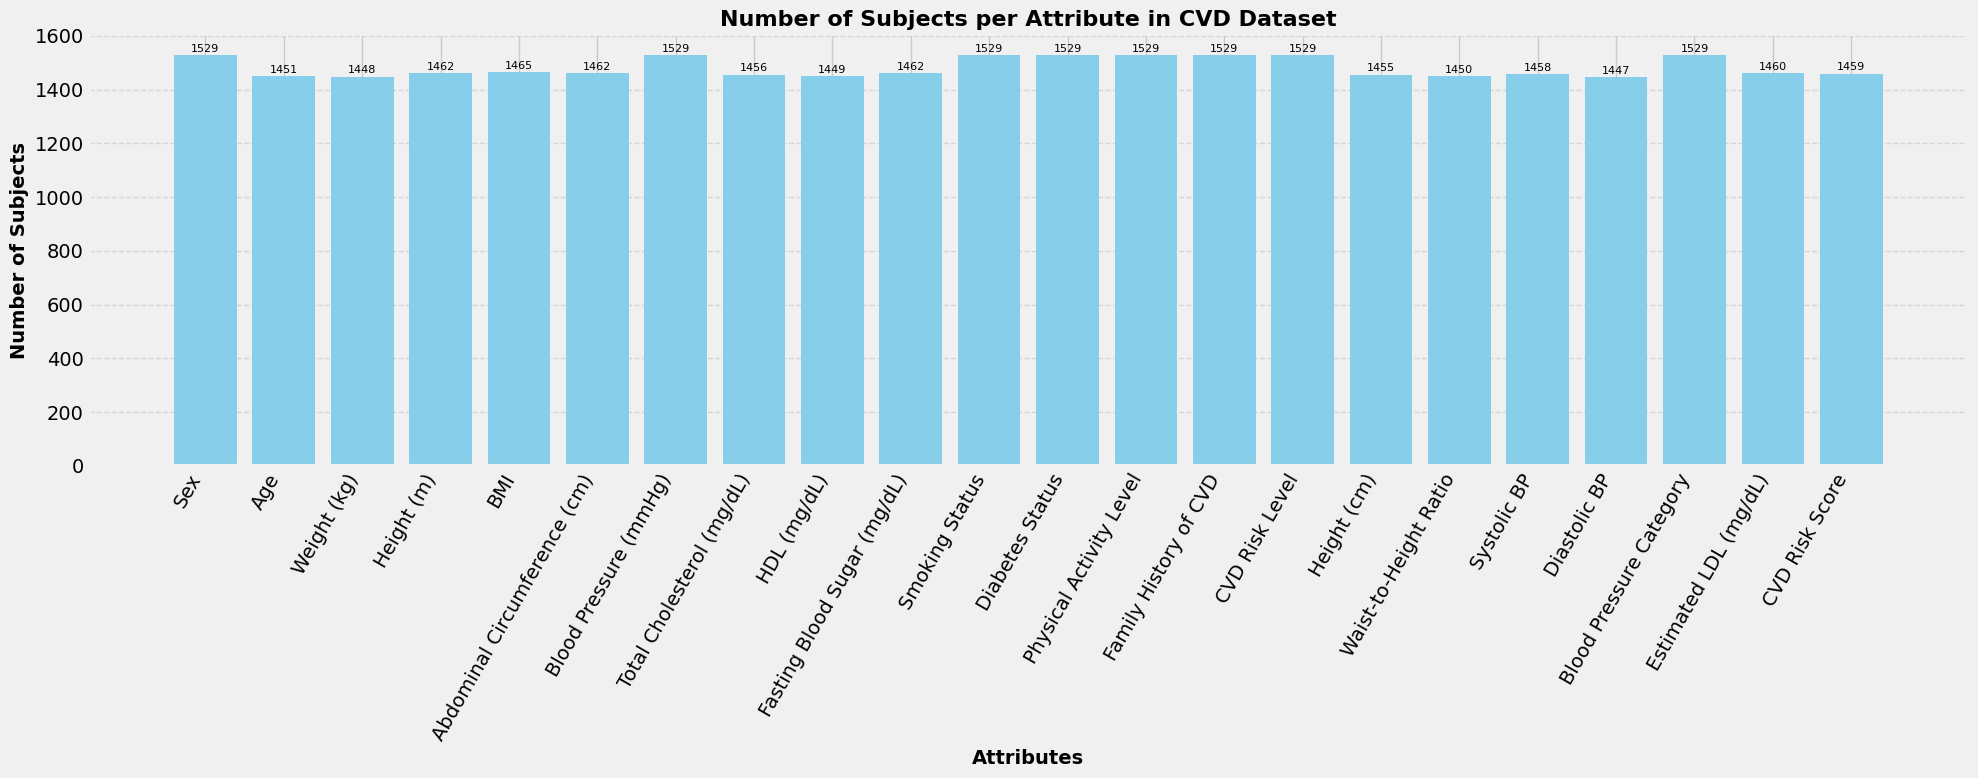

In [66]:
# CVD Dataset Structure: Number of Subjects per Attribute

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('CVD_Dataset.csv')

# Count the number of non-null entries for each column
attribute_counts = df.notnull().sum()

# Plotting
plt.figure(figsize=(20, 8))
bars = plt.bar(attribute_counts.index, attribute_counts.values, color='skyblue')

# Adding counts above bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 5, int(yval), ha='center', va='bottom', fontsize=8)

# Customize the plot
plt.xticks(rotation=60, ha='right')
plt.xlabel('Attributes', fontsize=14, weight='bold')
plt.ylabel('Number of Subjects', fontsize=14, weight='bold')
plt.title('Number of Subjects per Attribute in CVD Dataset', fontsize=16, weight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Data Preprocessing #
The following steps are performed on the dataset in this section:

- Dropping Redudant Columns
- Checking For Duplicated Rows
- Checking For Missing Values

In [67]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,171.0,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,169.0,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,183.0,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,NaN,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,186.0,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,187.0,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,182.0,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,174.0,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,186.0,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,186.0,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [68]:
df.tail(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
1519,F,53.0,101.530,1.727,35.423,110.121,143/67,174.0,38.0,161.0,Y,Y,High,Y,HIGH,172.657,0.638,143.0,67.0,Hypertension Stage 2,106.0,19.715
1520,M,29.0,89.388,1.716,26.208,78.400,165/72,223.0,49.0,94.0,N,Y,Low,N,LOW,171.635,0.457,165.0,72.0,Hypertension Stage 2,144.0,19.952
1521,F,48.0,116.299,1.665,23.504,107.219,97/74,216.0,82.0,168.0,Y,Y,Moderate,N,LOW,166.474,0.644,97.0,74.0,Normal,104.0,15.871
1522,F,41.0,117.365,1.748,38.310,118.246,105/87,200.0,35.0,87.0,Y,Y,High,N,INTERMEDIARY,174.814,0.676,105.0,87.0,Hypertension Stage 1,135.0,18.912
1523,M,63.0,91.625,1.702,35.278,NaN,162/60,189.0,76.0,153.0,N,Y,Moderate,N,INTERMEDIARY,NaN,0.601,162.0,60.0,Hypertension Stage 2,83.0,20.936
1524,F,40.0,72.070,1.889,NaN,95.326,119/66,157.0,60.0,93.0,N,N,Moderate,Y,LOW,188.894,0.505,119.0,66.0,Normal,67.0,14.300
1525,F,78.0,85.877,1.825,24.426,112.340,102/115,241.0,84.0,NaN,Y,N,Low,N,INTERMEDIARY,182.485,0.616,102.0,115.0,Hypertension Stage 2,127.0,14.805
1526,M,39.0,98.626,1.521,20.055,77.193,150/90,237.0,82.0,147.0,N,Y,High,N,INTERMEDIARY,152.119,0.507,150.0,90.0,Hypertension Stage 2,125.0,18.251
1527,M,71.0,116.163,1.841,29.279,114.197,112/63,193.0,84.0,123.0,N,N,High,Y,INTERMEDIARY,184.059,0.620,112.0,63.0,Normal,79.0,15.316
1528,F,78.0,111.627,1.867,22.017,97.692,134/67,218.0,68.0,166.0,N,N,High,N,HIGH,186.735,0.523,134.0,67.0,Hypertension Stage 1,120.0,15.463


In [69]:
df.drop(columns=['Height (cm)'], inplace=True)

In [70]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 21
Number of Instances In Dataset :  1529


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [72]:
df.head(10)

,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Smoking Status,Diabetes Status,Physical Activity Level,Family History of CVD,CVD Risk Level,Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score
0,F,32.0,69.1,1.71,23.6,86.2,125/79,248.0,78.0,111.0,N,Y,Low,N,INTERMEDIARY,0.504,125.0,79.0,Elevated,140.0,17.93
1,F,55.0,118.7,1.69,41.6,82.5,139/70,162.0,50.0,135.0,Y,Y,High,Y,HIGH,0.488,139.0,70.0,Hypertension Stage 1,82.0,20.51
2,M,NaN,NaN,1.83,26.9,106.7,104/77,103.0,73.0,114.0,N,N,High,Y,INTERMEDIARY,0.583,104.0,77.0,Normal,0.0,12.64
3,M,44.0,108.3,1.80,33.4,96.6,140/83,134.0,46.0,91.0,N,N,High,Y,INTERMEDIARY,0.537,140.0,83.0,Hypertension Stage 1,58.0,16.36
4,F,32.0,99.5,1.86,28.8,102.7,144/83,146.0,64.0,141.0,Y,Y,High,N,INTERMEDIARY,0.552,144.0,83.0,Hypertension Stage 1,52.0,17.88
5,F,58.0,117.9,1.87,33.7,81.4,142/90,156.0,67.0,82.0,Y,N,Moderate,Y,HIGH,0.435,142.0,90.0,Hypertension Stage 2,59.0,16.96
6,M,33.0,117.9,1.82,35.6,74.8,96/63,184.0,66.0,87.0,N,Y,Low,N,INTERMEDIARY,0.411,96.0,63.0,Normal,88.0,17.60
7,M,55.0,100.1,1.74,33.1,96.6,115/73,287.0,40.0,96.0,Y,N,Moderate,N,HIGH,0.555,115.0,73.0,Normal,217.0,18.11
8,F,37.0,110.1,1.86,31.8,92.4,107/95,177.0,68.0,70.0,Y,N,High,N,INTERMEDIARY,0.497,NaN,95.0,Hypertension Stage 2,79.0,15.25
9,F,58.0,97.6,1.86,28.2,74.6,133/83,281.0,68.0,126.0,N,N,Moderate,N,INTERMEDIARY,0.401,133.0,83.0,Hypertension Stage 1,183.0,17.91


In [73]:
df.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1451.000000,1448.000000,1462.000000,1465.000000,1462.000000,1456.000000,1449.000000,1462.000000,1450.000000,1458.000000,1447.000000,1460.000000,1459.000000
mean,47.025500,85.917427,1.754111,28.465997,91.773214,198.539148,56.197378,117.485636,0.525727,125.627572,82.917761,111.550685,16.960925
std,12.421063,21.012580,0.113090,7.038685,12.823573,57.794099,16.066754,30.289174,0.081213,22.112099,14.731277,58.866220,2.436192
min,25.000000,50.100000,1.502000,15.000000,70.000000,100.000000,30.000000,70.000000,0.360000,90.000000,60.000000,-18.000000,10.530000
25%,37.000000,67.050000,1.660000,22.629000,80.500000,150.000000,42.000000,92.000000,0.460000,107.000000,71.000000,61.000000,15.205000
50%,46.000000,86.614500,1.755000,28.159000,91.600000,197.000000,56.000000,115.000000,0.522000,125.000000,82.000000,109.000000,16.880000
75%,55.000000,105.000000,1.845500,34.000000,102.269000,249.000000,70.000000,138.000000,0.583750,141.000000,93.000000,159.000000,18.630000
max,79.000000,120.000000,2.000000,46.200000,119.996000,300.000000,89.000000,198.000000,0.787000,179.000000,119.000000,237.000000,24.170000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         1529 non-null   object 
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [75]:
# Convert necessary columns to numerical type for this project
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Weight (kg)'] = pd.to_numeric(df['Weight (kg)'], errors='coerce')
df['Height (m)'] = pd.to_numeric(df['Height (m)'], errors='coerce')
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['Abdominal Circumference (cm)'] = pd.to_numeric(df['Abdominal Circumference (cm)'], errors='coerce')
df['Blood Pressure (mmHg)'] = pd.to_numeric(df['Blood Pressure (mmHg)'], errors='coerce')
df['Total Cholesterol (mg/dL)'] = pd.to_numeric(df['Total Cholesterol (mg/dL)'], errors='coerce')
df['HDL (mg/dL)'] = pd.to_numeric(df['HDL (mg/dL)'], errors='coerce')
df['Fasting Blood Sugar (mg/dL)'] = pd.to_numeric(df['Fasting Blood Sugar (mg/dL)'], errors='coerce')
df['Systolic BP'] = pd.to_numeric(df['Systolic BP'], errors='coerce')
df['Diastolic BP'] = pd.to_numeric(df['Diastolic BP'], errors='coerce')
df['Estimated LDL (mg/dL)'] = pd.to_numeric(df['Estimated LDL (mg/dL)'], errors='coerce')
df['CVD Risk Score'] = pd.to_numeric(df['CVD Risk Score'], errors='coerce')
df['Waist-to-Height Ratio'] = pd.to_numeric(df['Waist-to-Height Ratio'], errors='coerce')



In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sex                           1529 non-null   object 
 1   Age                           1451 non-null   float64
 2   Weight (kg)                   1448 non-null   float64
 3   Height (m)                    1462 non-null   float64
 4   BMI                           1465 non-null   float64
 5   Abdominal Circumference (cm)  1462 non-null   float64
 6   Blood Pressure (mmHg)         0 non-null      float64
 7   Total Cholesterol (mg/dL)     1456 non-null   float64
 8   HDL (mg/dL)                   1449 non-null   float64
 9   Fasting Blood Sugar (mg/dL)   1462 non-null   float64
 10  Smoking Status                1529 non-null   object 
 11  Diabetes Status               1529 non-null   object 
 12  Physical Activity Level       1529 non-null   object 
 13  Fam

In [77]:
# Extracting categorical and numerical columns for this project
categorical_columns = ['Sex', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level', 'Blood Pressure Category']
numerical_columns = ['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Systolic BP', 'Diastolic BP', 'Estimated LDL (mg/dL)', 'CVD Risk Score', 'Waist-to-Height Ratio']



In [78]:
# Looking at unique values in categorical columns for this project
for column in categorical_columns:
    print(f"Unique values in {column} for this project: {df[column].unique()}")



Unique values in Sex for this project: ['F' 'M']
Unique values in Smoking Status for this project: ['N' 'Y']
Unique values in Diabetes Status for this project: ['Y' 'N']
Unique values in Physical Activity Level for this project: ['Low' 'High' 'Moderate']
Unique values in Family History of CVD for this project: ['N' 'Y']
Unique values in CVD Risk Level for this project: ['INTERMEDIARY' 'HIGH' 'LOW']
Unique values in Blood Pressure Category for this project: ['Elevated' 'Hypertension Stage 1' 'Normal' 'Hypertension Stage 2']


In [79]:
df['Sex'] = df['Sex'].replace('Y', pd.NA)
df['Sex'] = df['Sex'].replace('M', 'Male')
df['Sex'] = df['Sex'].replace('F', 'Female')


In [80]:
if 'classification' in df.columns:
    df['classification'] = df['classification'].map({'cvd': 0, 'not cvd': 1})
    df['classification'] = pd.to_numeric(df['classification'], errors='coerce')
else:
    print("The column 'classification' does not exist in the DataFrame.")

The column 'classification' does not exist in the DataFrame.


# Exploratry Data Analysis #

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

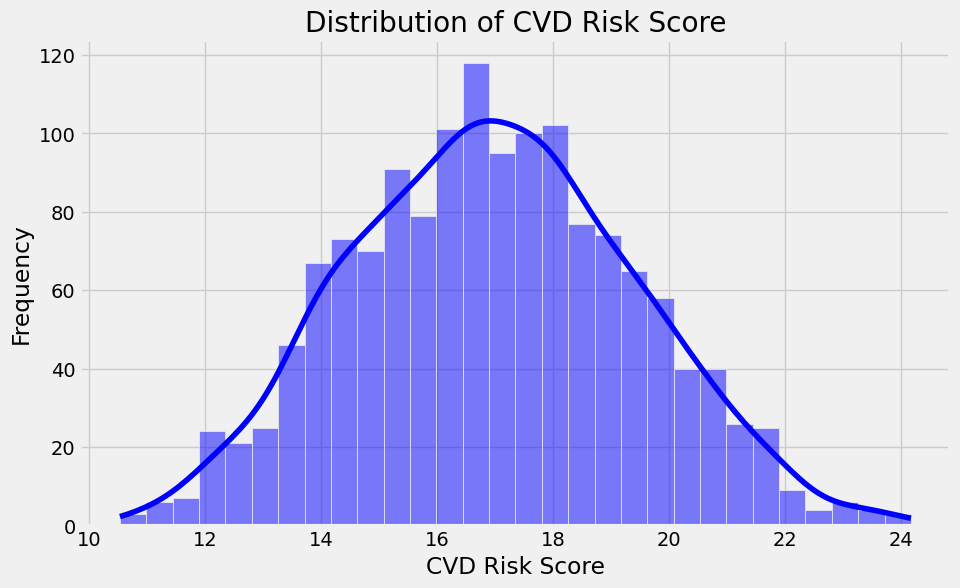

In [82]:
# Plotting the distribution of CVD Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['CVD Risk Score'], bins=30, kde=True, color='blue')
plt.title('Distribution of CVD Risk Score')
plt.xlabel('CVD Risk Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


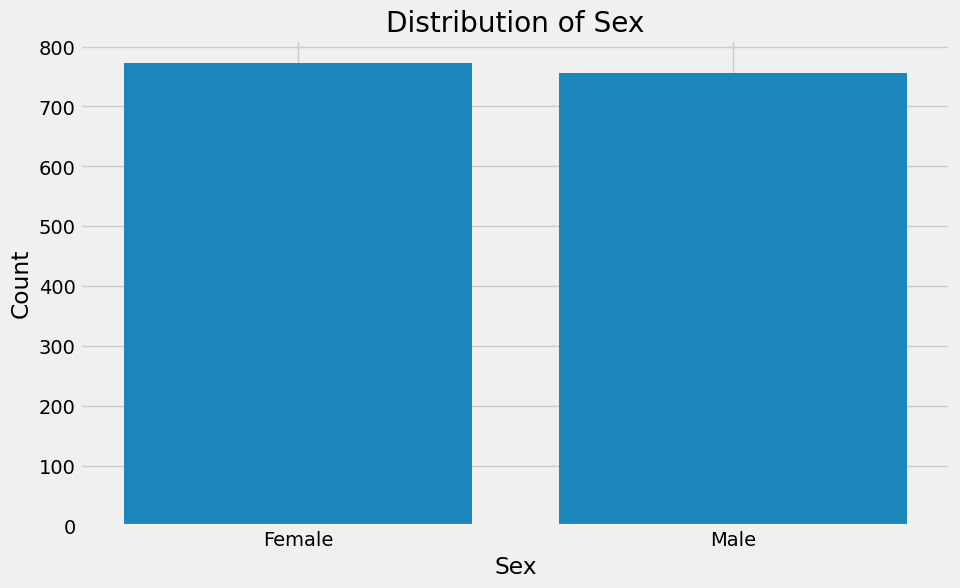

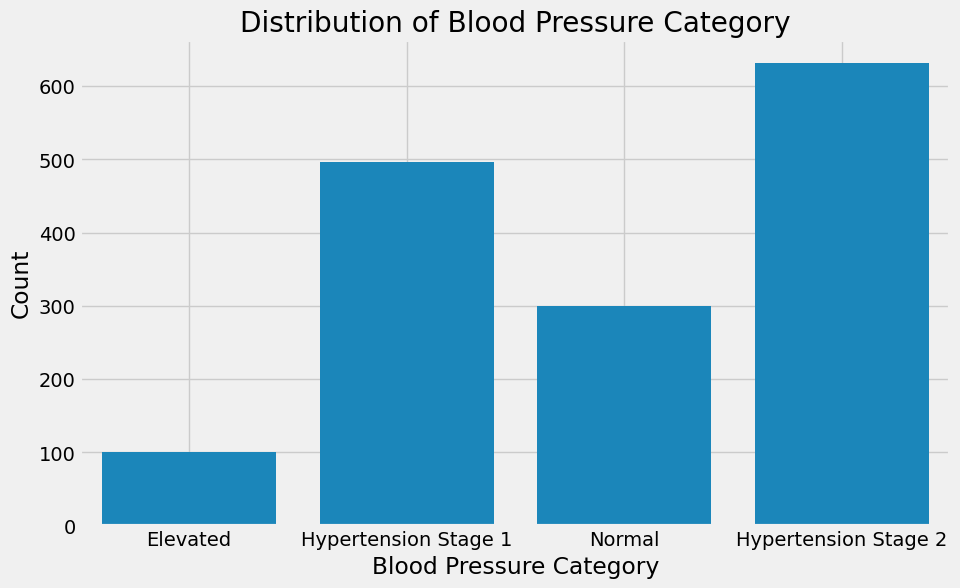

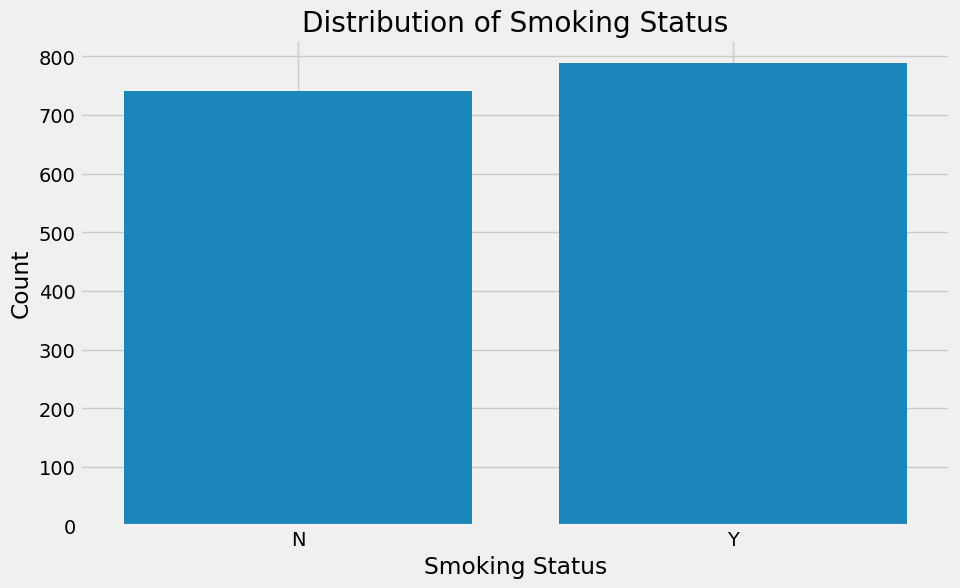

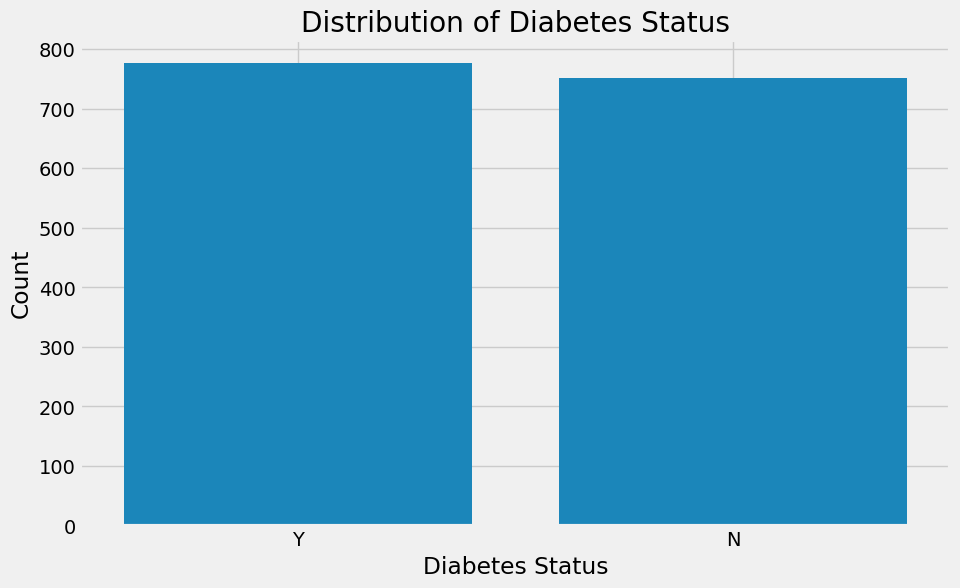

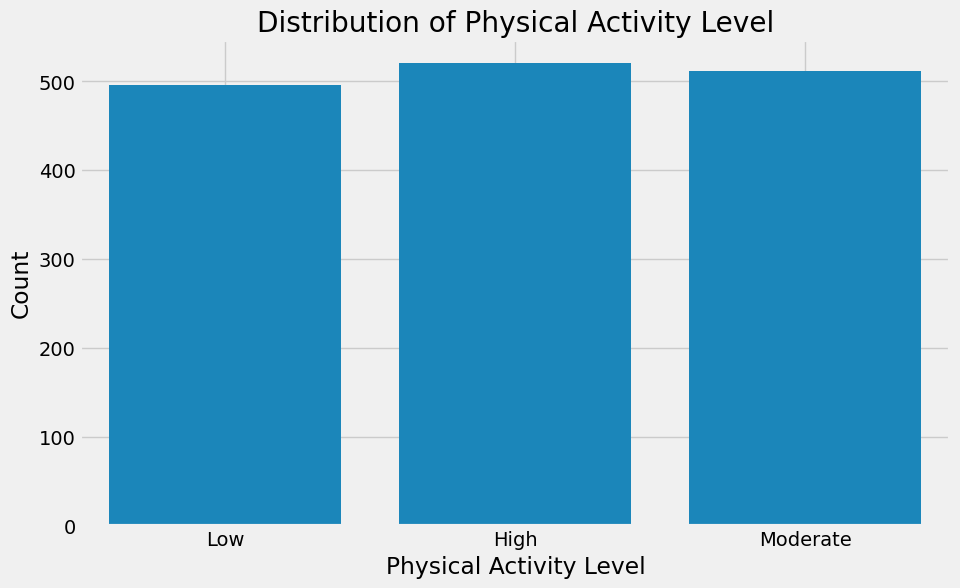

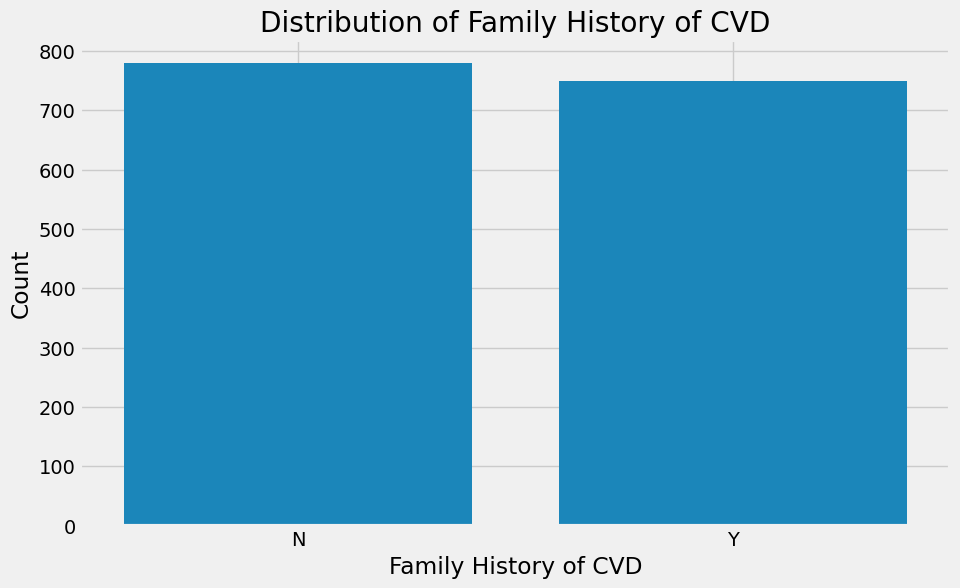

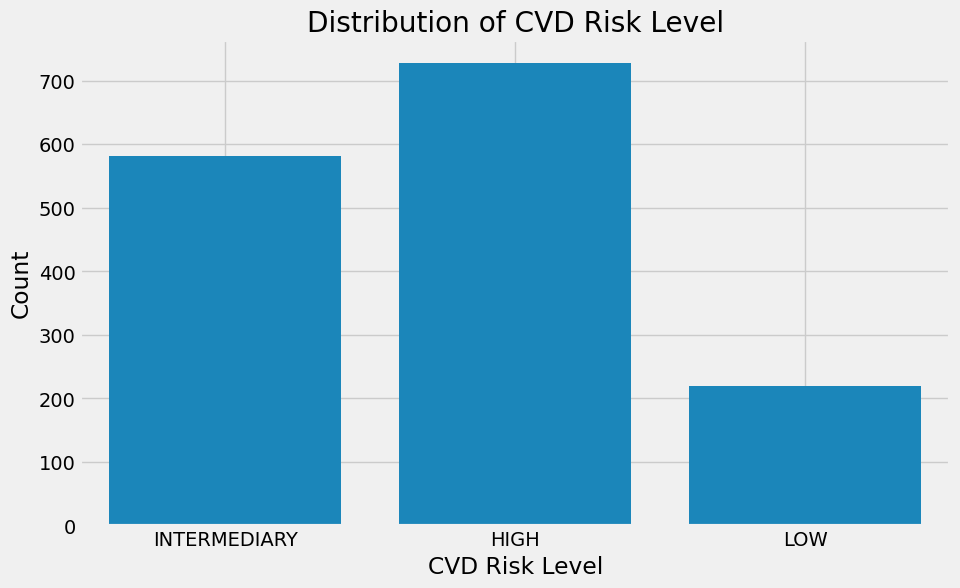

In [83]:
# Analyzing categorical columns
categorical_columns = ['Sex', 'Blood Pressure Category', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level']
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


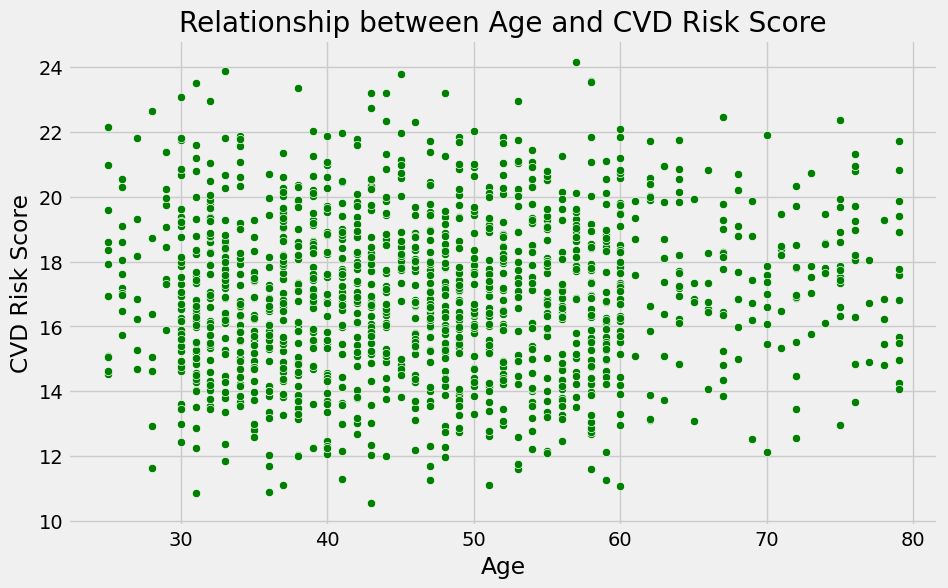

In [84]:
# Analyzing the relationship between Age and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='CVD Risk Score', data=df, color='green')
plt.title('Relationship between Age and CVD Risk Score')
plt.xlabel('Age')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

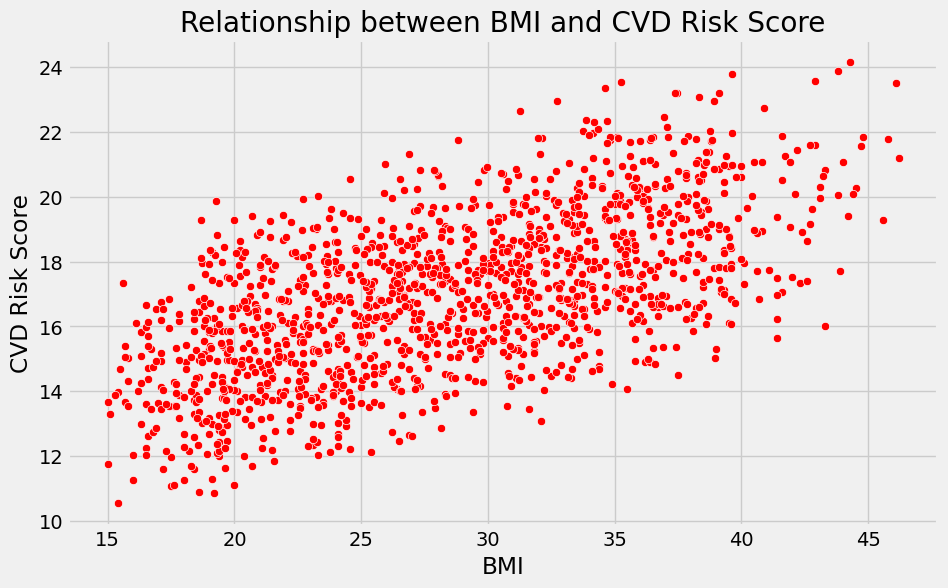

In [85]:
# Analyzing the relationship between BMI and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between BMI and CVD Risk Score')
plt.xlabel('BMI')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

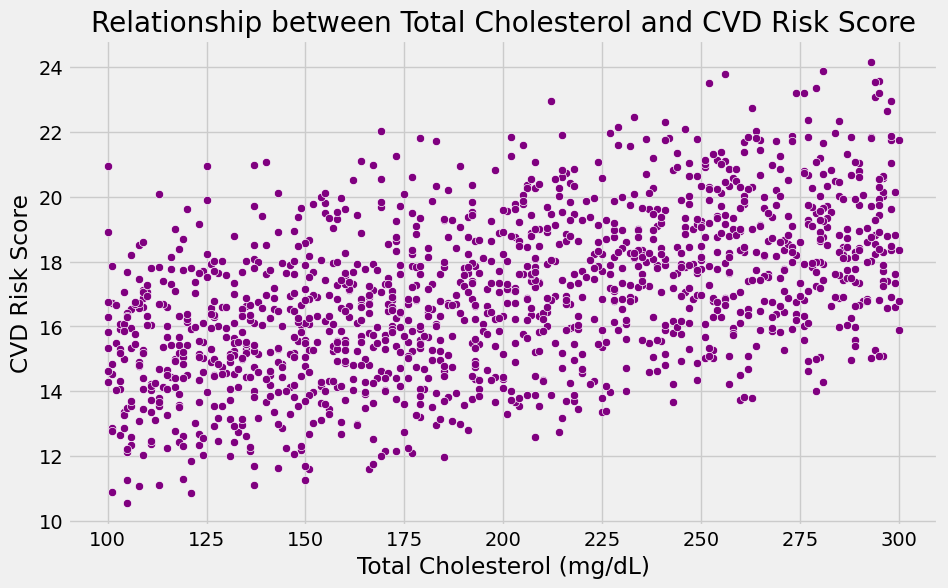

In [86]:
# Analyzing the relationship between Total Cholesterol and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Cholesterol (mg/dL)', y='CVD Risk Score', data=df, color='purple')
plt.title('Relationship between Total Cholesterol and CVD Risk Score')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

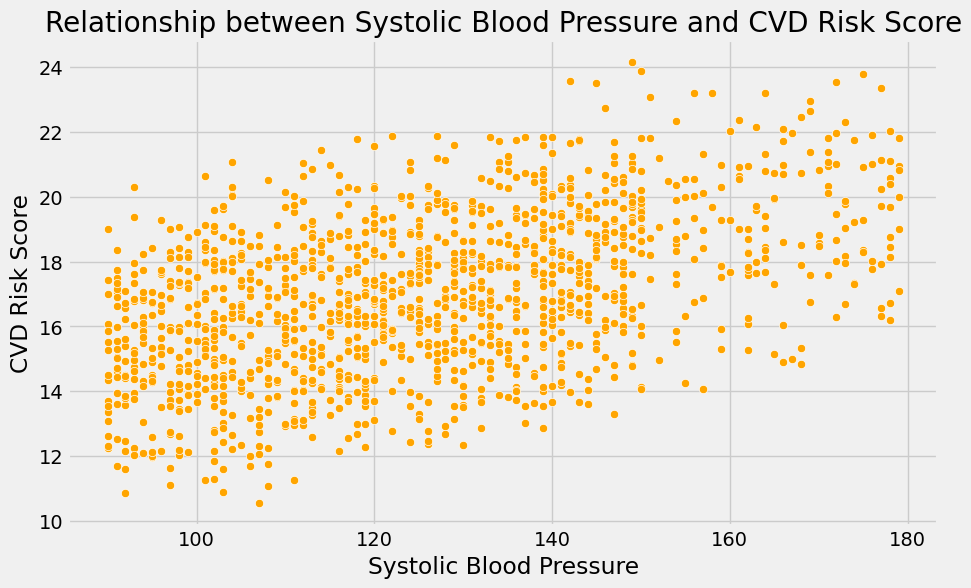

In [87]:
# Analyzing the relationship between Blood Pressure and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between Systolic Blood Pressure and CVD Risk Score')
plt.xlabel('Systolic Blood Pressure')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()


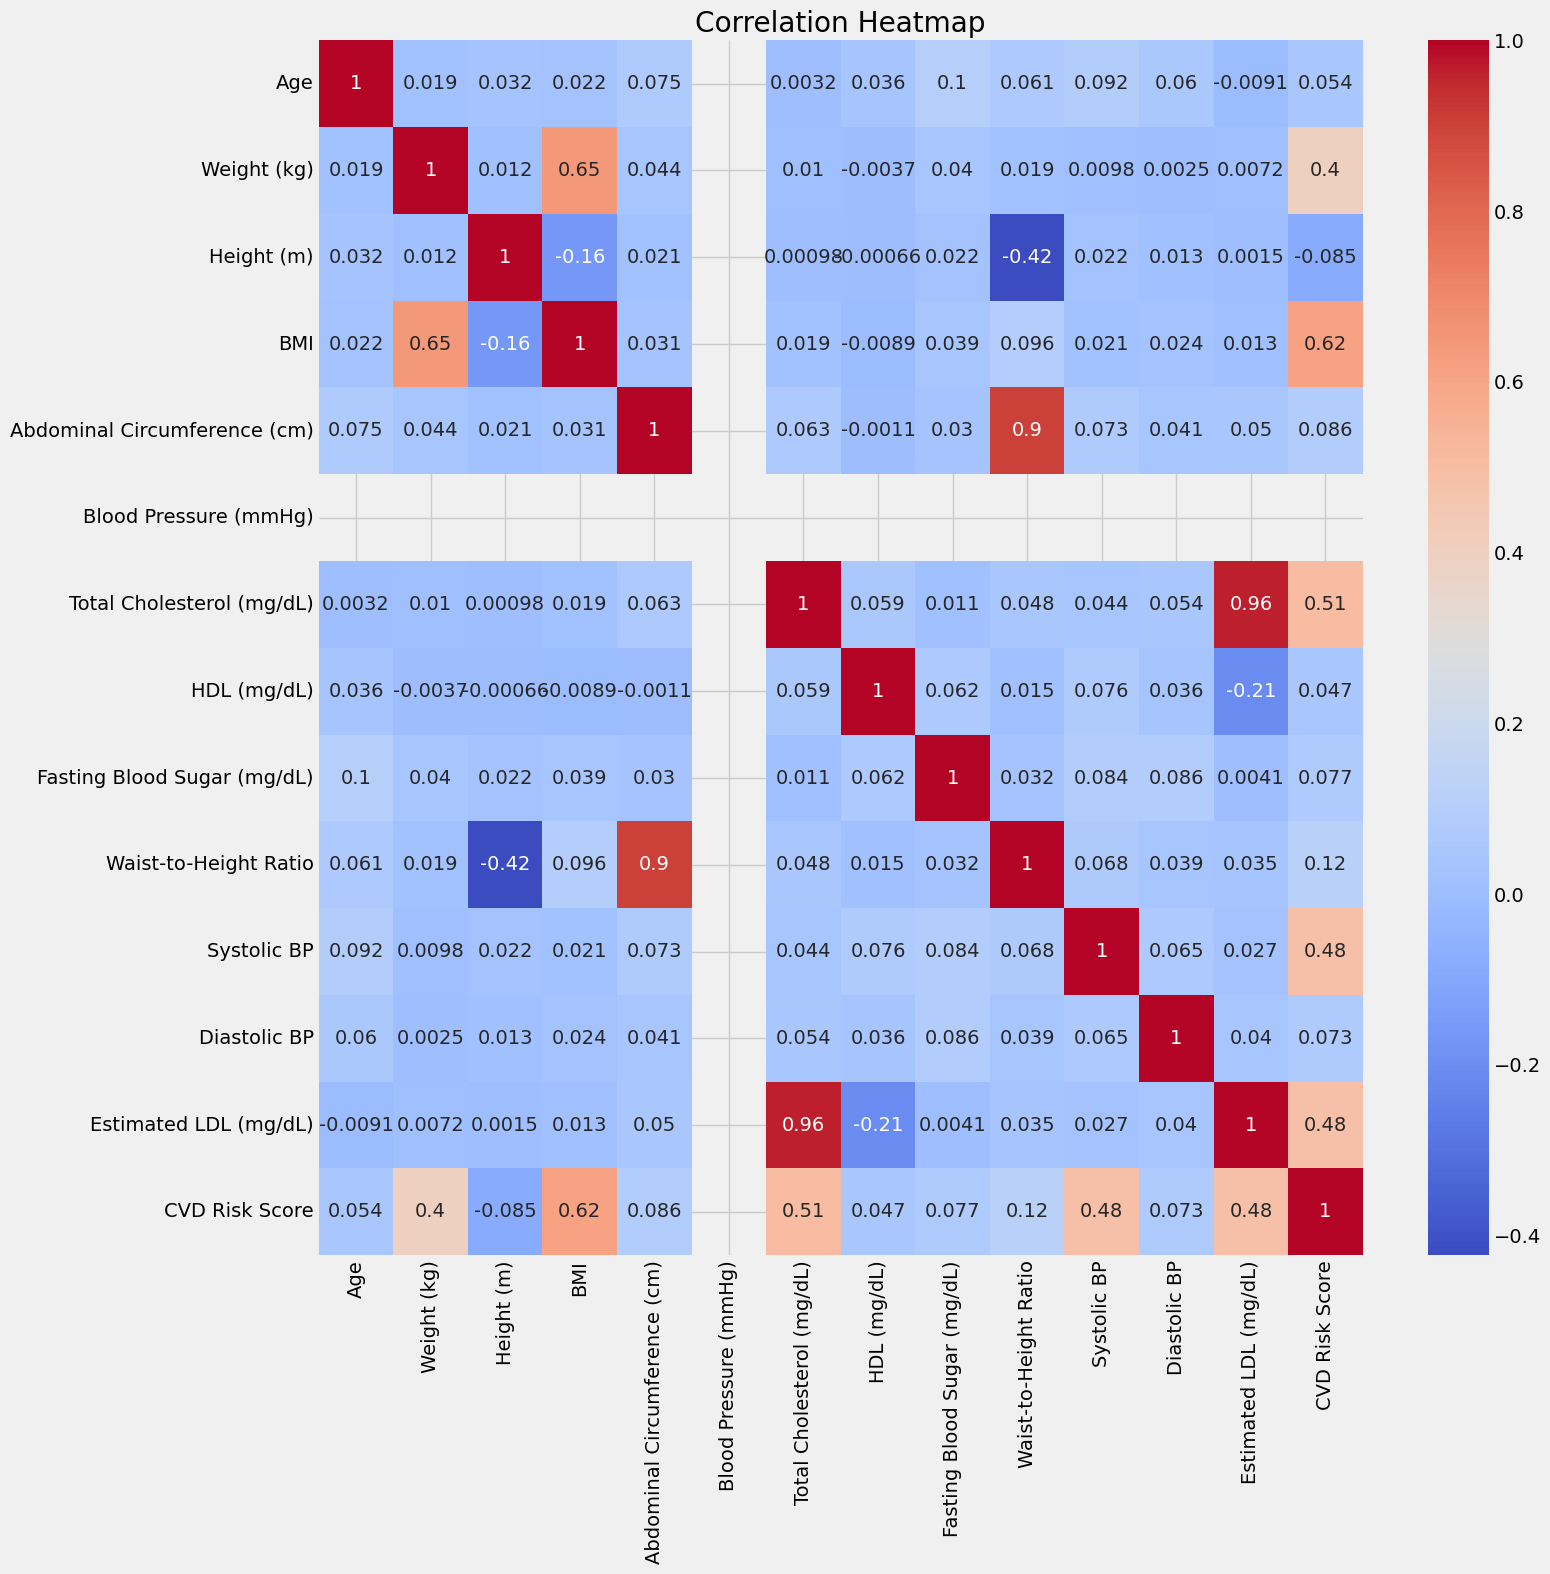

In [88]:
# Correlation Heatmap
df_numeric = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


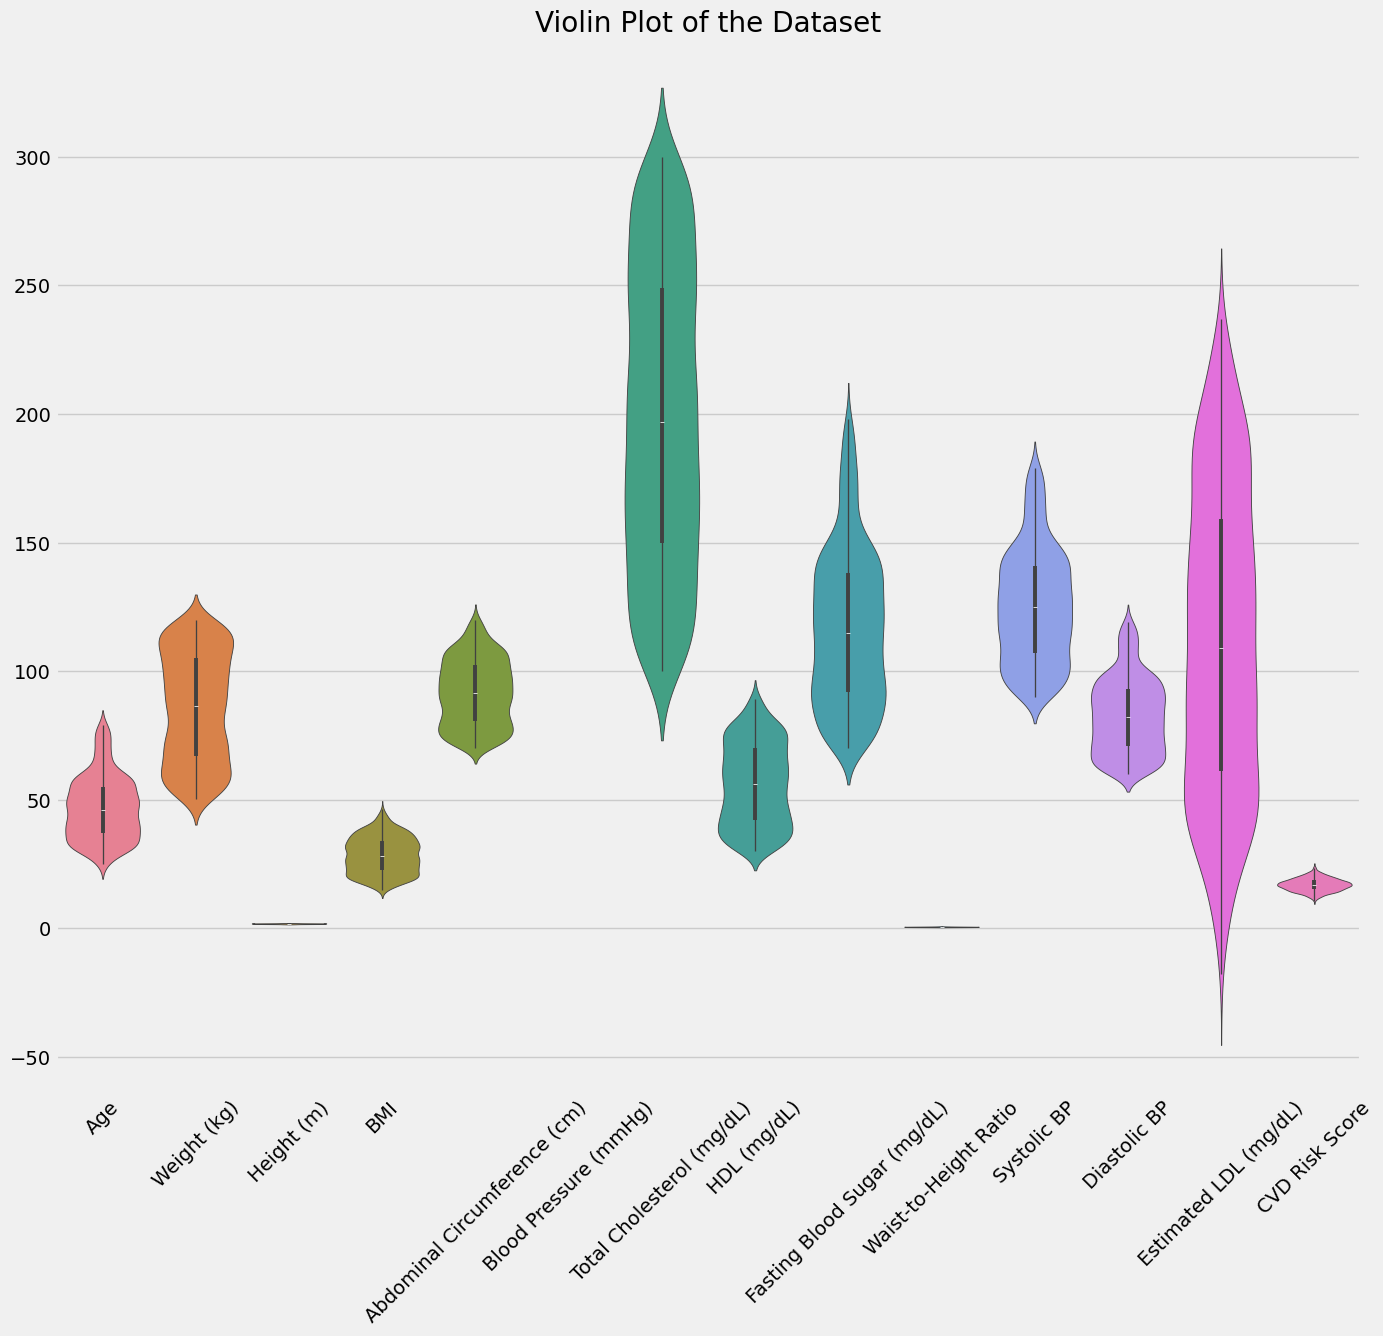

In [89]:
# Violin Plot of the Dataset
plt.figure(figsize=(15, 13))
sns.violinplot(data=df)
plt.title('Violin Plot of the Dataset')
plt.xticks(rotation=45)
plt.show()


<Figure size 400x300 with 0 Axes>

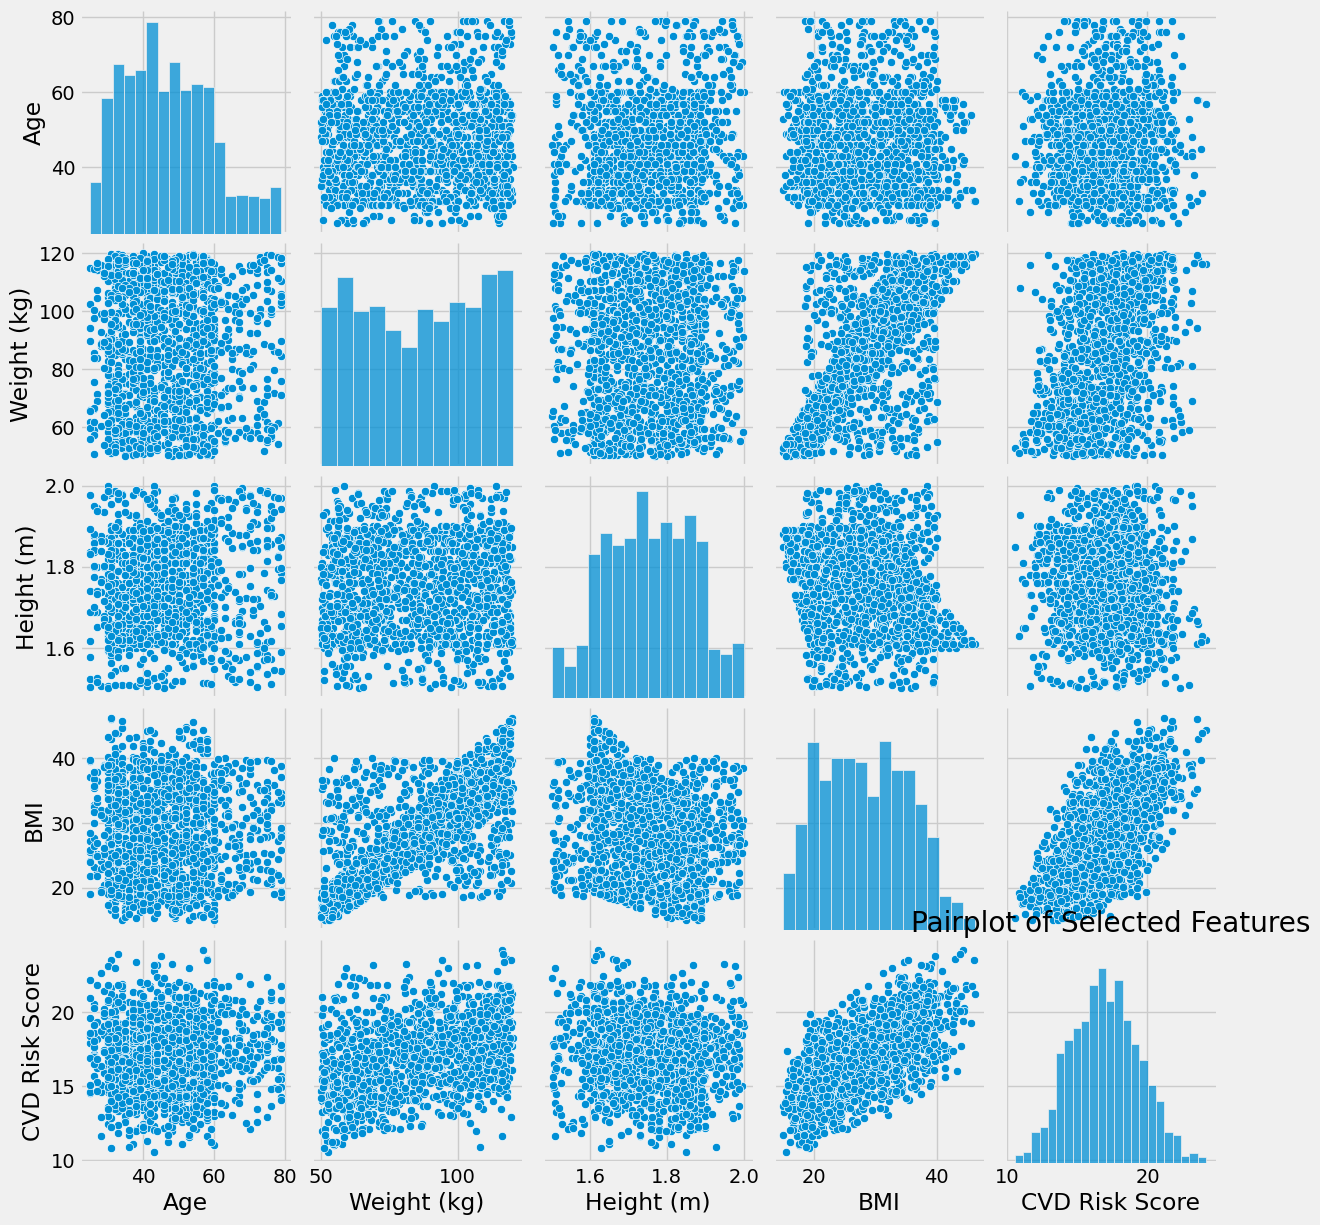

In [90]:
# Pairplot of Selected Features
plt.figure(figsize=(4, 3))
sns.pairplot(df[['Age', 'Weight (kg)', 'Height (m)', 'BMI', 'CVD Risk Score']], markers=['o', 's', 'D'])
plt.title('Pairplot of Selected Features')
plt.show()



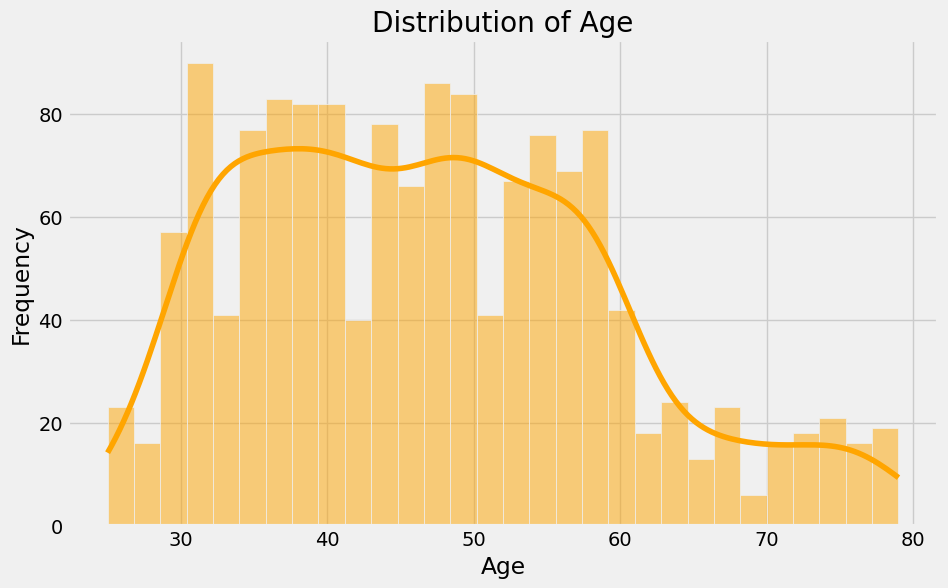

In [91]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='orange')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

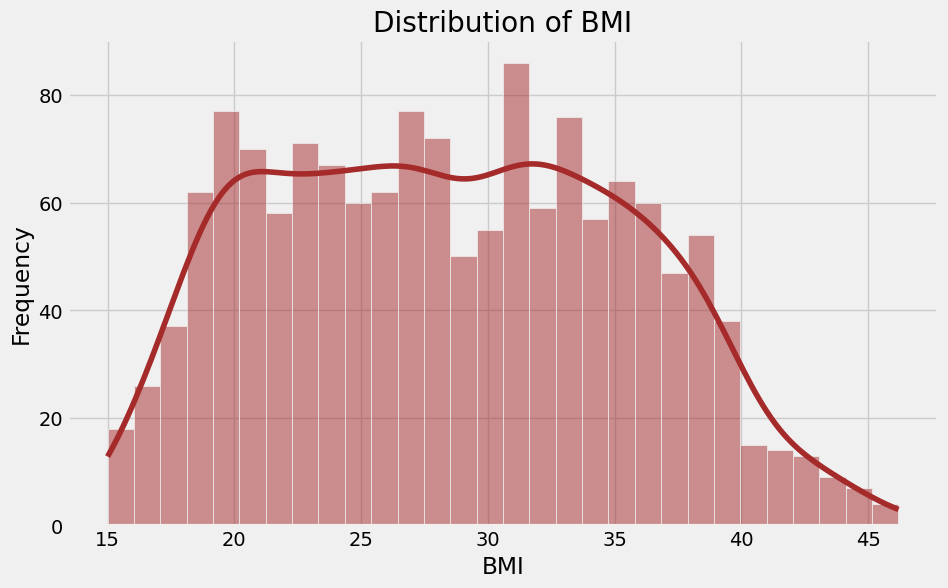

In [92]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True, color='brown')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

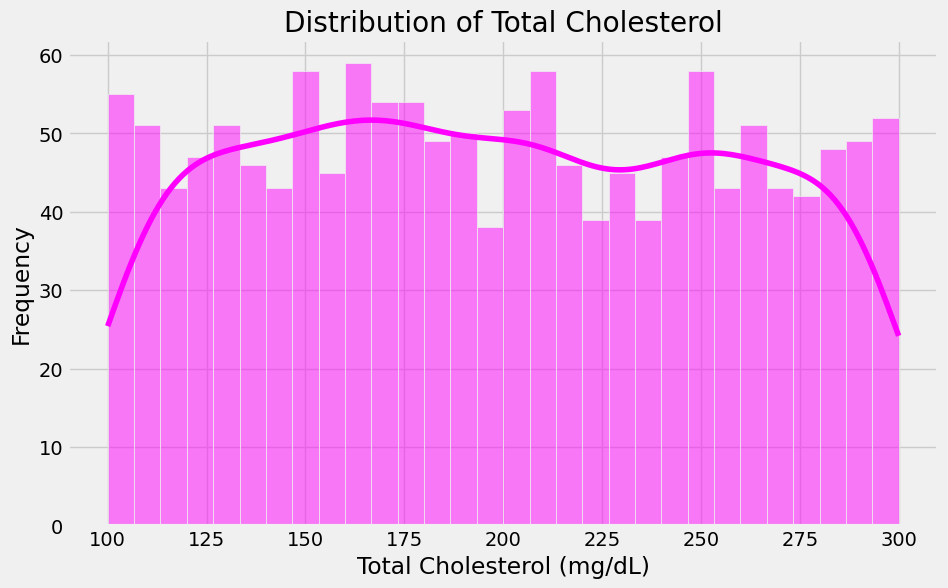

In [93]:
# Distribution of Total Cholesterol
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Cholesterol (mg/dL)'], bins=30, kde=True, color='magenta')
plt.title('Distribution of Total Cholesterol')
plt.xlabel('Total Cholesterol (mg/dL)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

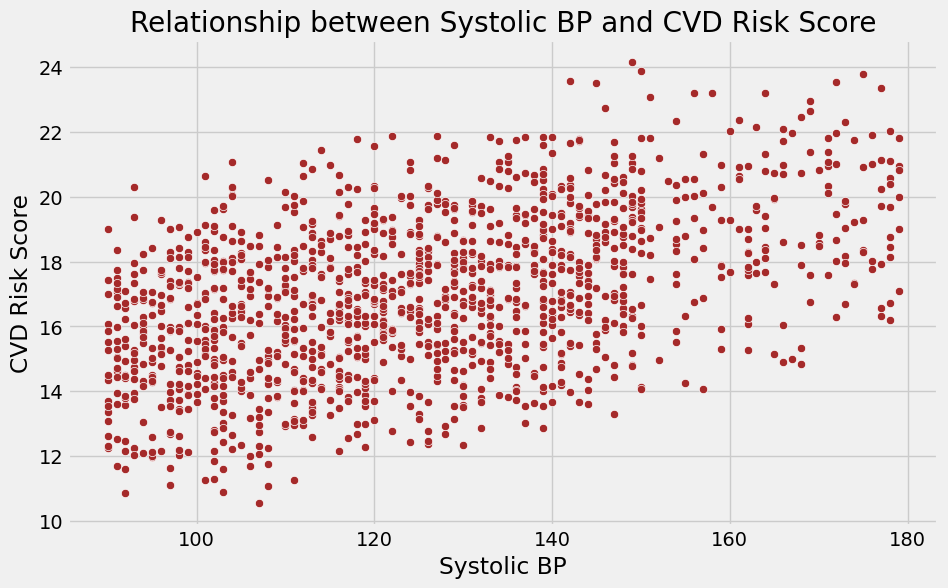

In [94]:
# Relationship between Systolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Systolic BP', y='CVD Risk Score', data=df, color='brown')
plt.title('Relationship between Systolic BP and CVD Risk Score')
plt.xlabel('Systolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

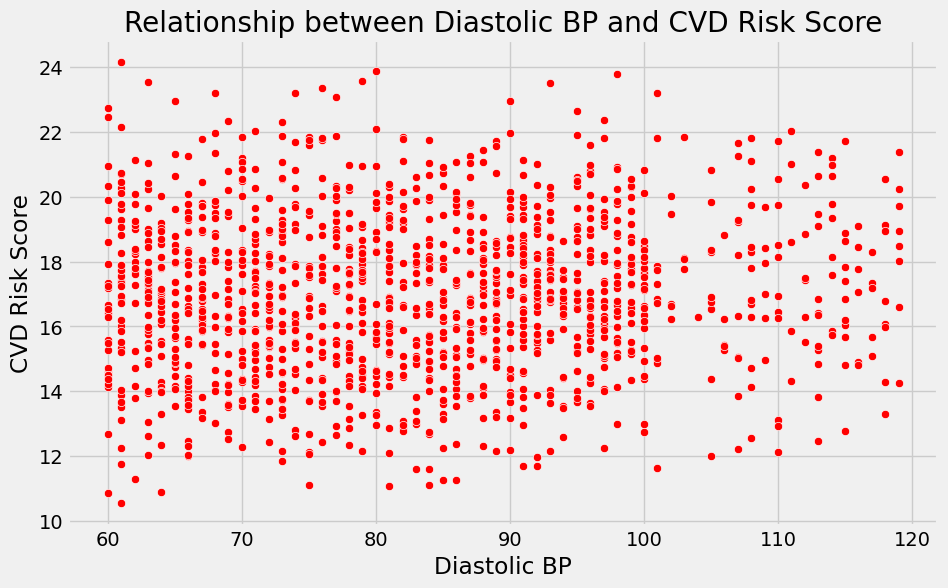

In [95]:
# Relationship between Diastolic BP and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Diastolic BP', y='CVD Risk Score', data=df, color='red')
plt.title('Relationship between Diastolic BP and CVD Risk Score')
plt.xlabel('Diastolic BP')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

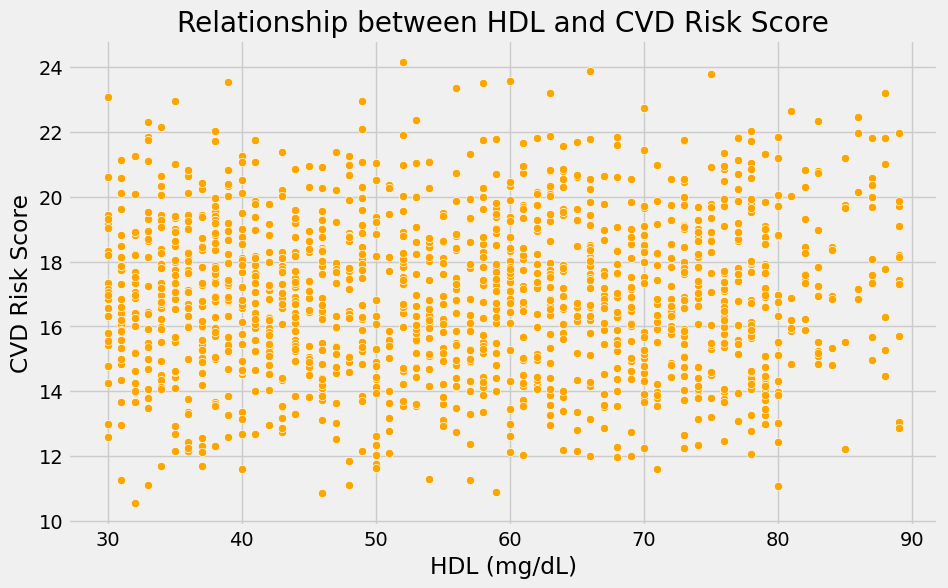

In [96]:
# Relationship between HDL and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HDL (mg/dL)', y='CVD Risk Score', data=df, color='orange')
plt.title('Relationship between HDL and CVD Risk Score')
plt.xlabel('HDL (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

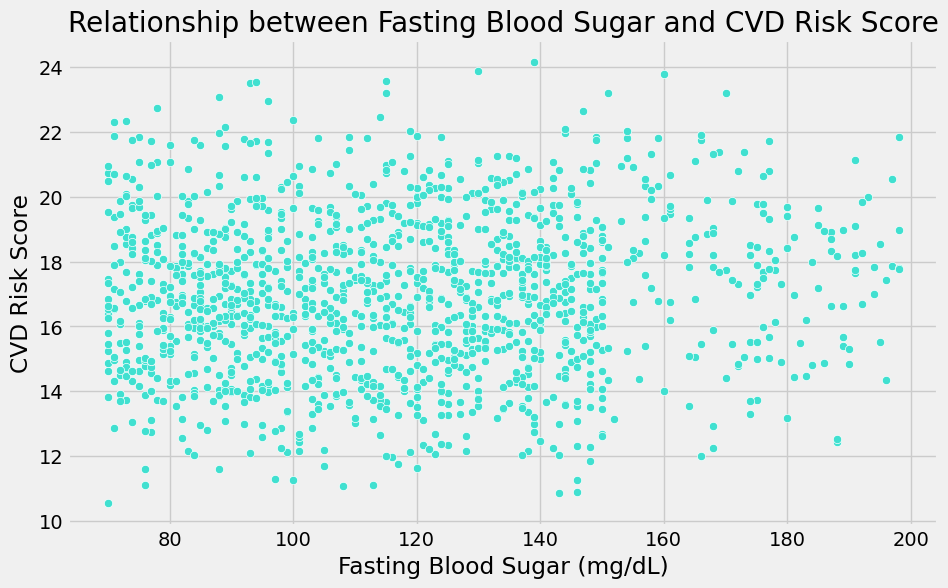

In [97]:
# Relationship between Fasting Blood Sugar and CVD Risk Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fasting Blood Sugar (mg/dL)', y='CVD Risk Score', data=df, color='turquoise')
plt.title('Relationship between Fasting Blood Sugar and CVD Risk Score')
plt.xlabel('Fasting Blood Sugar (mg/dL)')
plt.ylabel('CVD Risk Score')
plt.grid(True)
plt.show()

### Balancing Dataset ###

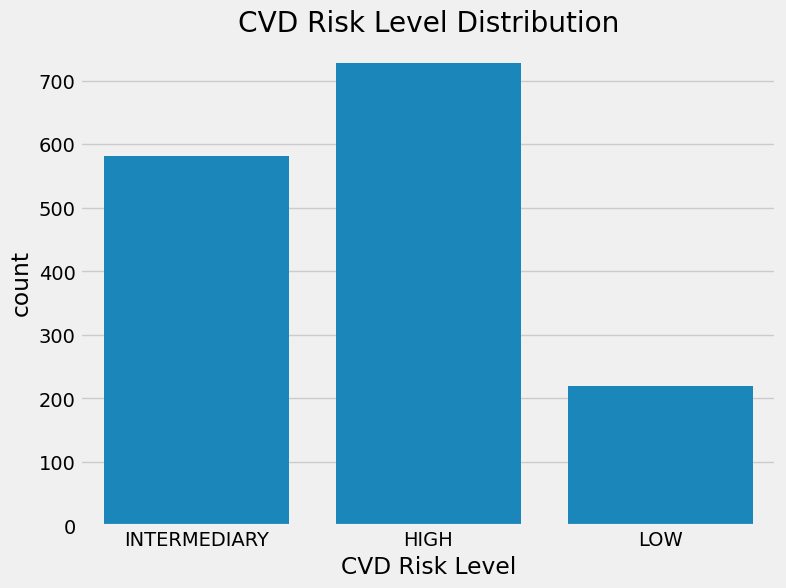

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the balance of the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='CVD Risk Level', data=df)
plt.title('CVD Risk Level Distribution')
plt.show()


In [99]:
# Explore imbalance in the dataset
print(df['CVD Risk Level'].value_counts())

CVD Risk Level
HIGH            728
INTERMEDIARY    581
LOW             220
Name: count, dtype: int64


In [100]:
X = df.drop(['CVD Risk Level'], axis=1)
y = df['CVD Risk Level']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (1529, 20)
Target (y) Shape Before Balancing : (1529,)


In [101]:
sm = SMOTE(random_state=300)

In [102]:
# Convert categorical variables to numerical variables before resampling
X = pd.get_dummies(X, drop_first=True)
# Impute missing values before resampling
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
# Resampling Data
X_resampled, y_resampled = sm.fit_resample(X_imputed, y)

In [103]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (1529, 23)
Target (y) Shape After Balancing : (1529,)


In [104]:
# Scaling features between -1 and 1  for mormalization 
scaler = MinMaxScaler((-1,1))

In [105]:
# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y

In [106]:
# splitting the dataset into traning and testing sets into 80 - 20
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)

In [107]:
df.columns

Index(['Sex', 'Age', 'Weight (kg)', 'Height (m)', 'BMI',
       'Abdominal Circumference (cm)', 'Blood Pressure (mmHg)',
       'Total Cholesterol (mg/dL)', 'HDL (mg/dL)',
       'Fasting Blood Sugar (mg/dL)', 'Smoking Status', 'Diabetes Status',
       'Physical Activity Level', 'Family History of CVD', 'CVD Risk Level',
       'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP',
       'Blood Pressure Category', 'Estimated LDL (mg/dL)', 'CVD Risk Score'],
      dtype='object')

## Machine Learning Model Training #
In this section, we have trained and evaluated the following Machine Learning Models to predict Parkinson's disease diagnosis:

- Decision Tree Classifier: This model is simple to implement and interpret, but can be prone to overfitting.
- Random Forest Classifier: This ensemble model combines multiple decision trees to improve accuracy and reduce overfitting.
- Logistic Regression: This linear model is suitable for binary classification problems and provides interpretable coefficients.
- SVM (Support Vector Machine): This model is effective in high-dimensional spaces and can handle non-linear relationships.
- Naive Bayes: This family of probabilistic models is simple to implement and can handle categorical features.
- KNN Classifier: This model is based on the idea that similar instances should have similar labels.
- XGBoost Classifier: This gradient boosting model is known for its high accuracy and speed in handling large datasets.

Decision Tree
Random Forest
Logistic Regression
SVM (Support Vector Machine)
Naive Bayes
KNN Classifier
XGBoost

### Decision Tree ###

In [301]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Training and Evaluating the Decision Tree Classifier with improved parameters
clf = DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=14,min_samples_split=10, random_state=64)
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

        HIGH       0.70      0.83      0.76       137
INTERMEDIARY       0.66      0.68      0.67       123
         LOW       0.25      0.09      0.13        46

    accuracy                           0.66       306
   macro avg       0.54      0.53      0.52       306
weighted avg       0.62      0.66      0.63       306



In [307]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(6,7),
    'random_state':range(64,100,64),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                                              min_samples_leaf=14,
                                              min_samples_split=10,
                                              random_state=64),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 7),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(64, 100, 64)})

In [308]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 64}

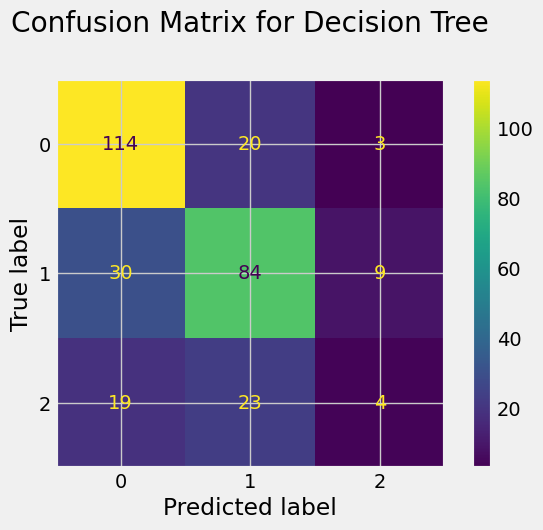

In [309]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, clf.predict(X_test))

# Plotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.title('Confusion Matrix for Decision Tree', y=1.1)
plt.show()



In [310]:
import joblib
# Dumping Decision Tree Classifier
joblib.dump(clf, 'dt_clf.pkl')

['dt_clf.pkl']

### Random Forest ###

In [339]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Training and Evaluating the Decision Tree Classifier with improved parameters
clf = RandomForestClassifier(max_depth=9, min_samples_leaf=14,min_samples_split=31, random_state=64)
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

        HIGH       0.67      0.91      0.77       137
INTERMEDIARY       0.71      0.69      0.70       123
         LOW       0.00      0.00      0.00        46

    accuracy                           0.69       306
   macro avg       0.46      0.53      0.49       306
weighted avg       0.59      0.69      0.63       306



In [340]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Create a base model
rf = RandomForestClassifier(random_state=50)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
grid_search.best_params_



Fitting 3 folds for each of 90 candidates, totalling 270 fits


{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

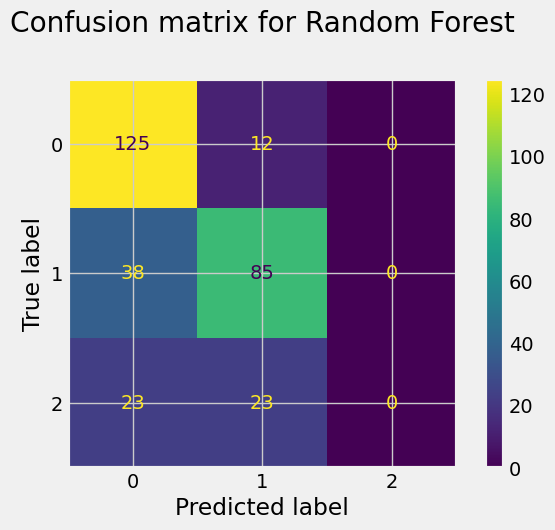

In [341]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()


In [342]:
import joblib
joblib.dump(clf, 'rf_clf.pkl')

['rf_clf.pkl']

### Logistic Regression ###

In [373]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

clf = LogisticRegression(max_iter=9, random_state=64)
clf.fit(X_train_imputed, y_train)
predDT = clf.predict(X_test_imputed)
print("Classification Report for Logistic Regression Classifier:")
print(classification_report(y_test, predDT))

Classification Report for Logistic Regression Classifier:
              precision    recall  f1-score   support

        HIGH       0.69      0.85      0.76       137
INTERMEDIARY       0.67      0.71      0.69       123
         LOW       0.50      0.09      0.15        46

    accuracy                           0.68       306
   macro avg       0.62      0.55      0.53       306
weighted avg       0.65      0.68      0.64       306



In [374]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_imputed, y_train)

print("Best Parameters: ", grid_search.best_params_)


Best Parameters:  {'C': 1, 'max_iter': 500, 'penalty': 'l2'}


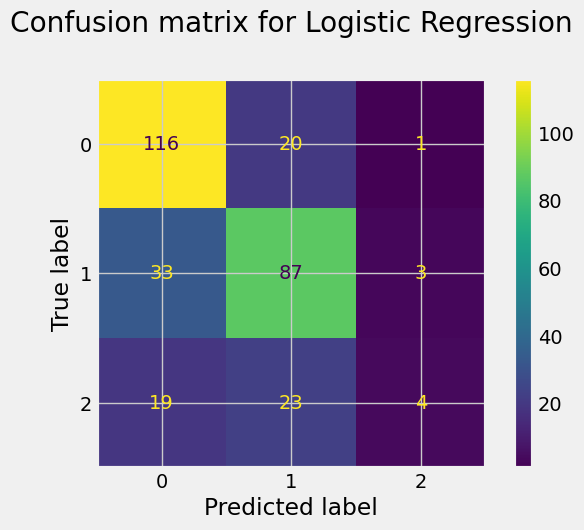

In [375]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, predDT)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Logistic Regression', y=1.1)
plt.show()

In [376]:
import joblib
joblib.dump(clf, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

### SVM (Support Vector Machine) ###

In [377]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create a svm Classifier
clf = SVC(kernel='linear')
# Train the model using the training sets
clf.fit(X_train_imputed, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_imputed)

accuracy = accuracy_score(y_test, y_pred)

print("Classification Report for SVM Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for SVM Classifier:
              precision    recall  f1-score   support

        HIGH       0.69      0.88      0.77       137
INTERMEDIARY       0.69      0.74      0.72       123
         LOW       0.00      0.00      0.00        46

    accuracy                           0.69       306
   macro avg       0.46      0.54      0.50       306
weighted avg       0.59      0.69      0.63       306



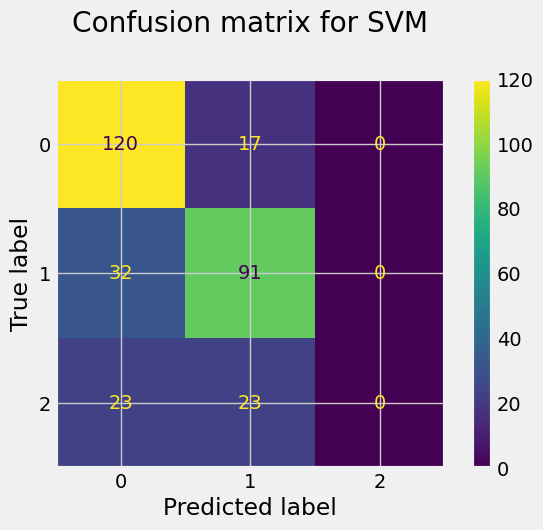

In [378]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming clf is the SVM model defined earlier
y_pred = clf.predict(X_test_imputed)
confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for SVM', y=1.1)
plt.show()

In [380]:
joblib.dump(clf, 'svm_model.pkl')

['svm_model.pkl']

### Naive Bayes ###

In [433]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the parameter grid for the grid search
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}

# Initialize GaussianNB with default parameters
gnb = GaussianNB()

# Perform grid search over specified parameter values
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
best_gnb = grid_search.best_estimator_
predgnb = best_gnb.predict(X_test_scaled)

print("Classification Report for Naive Bayes Classifier:")
print(classification_report(y_test, predgnb))

Fitting 5 folds for each of 11 candidates, totalling 55 fits
Classification Report for Naive Bayes Classifier:
              precision    recall  f1-score   support

        HIGH       0.72      0.79      0.75       137
INTERMEDIARY       0.68      0.65      0.66       123
         LOW       0.27      0.22      0.24        46

    accuracy                           0.65       306
   macro avg       0.55      0.55      0.55       306
weighted avg       0.63      0.65      0.64       306



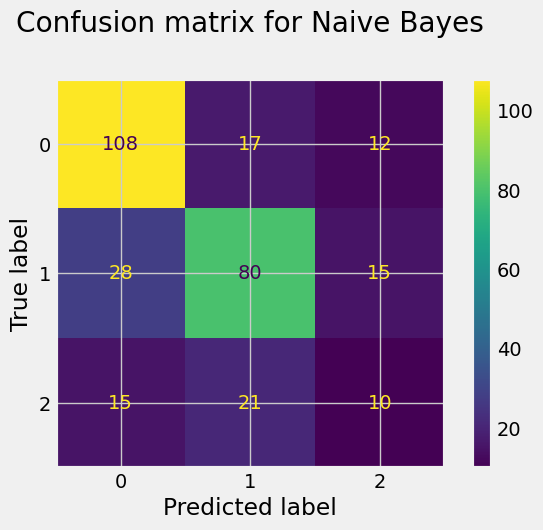

In [419]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predgnb)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for Naive Bayes', y=1.1)
plt.show()

In [420]:
joblib.dump(best_gnb, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

### KNN Classifier ###

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Classification Report for KNN Classifier for this project:
              precision    recall  f1-score   support

        HIGH       0.61      0.88      0.72       137
INTERMEDIARY       0.67      0.56      0.61       123
         LOW       0.14      0.02      0.04        46

    accuracy                           0.62       306
   macro avg       0.48      0.49      0.46       306
weighted avg       0.56      0.62      0.57       306



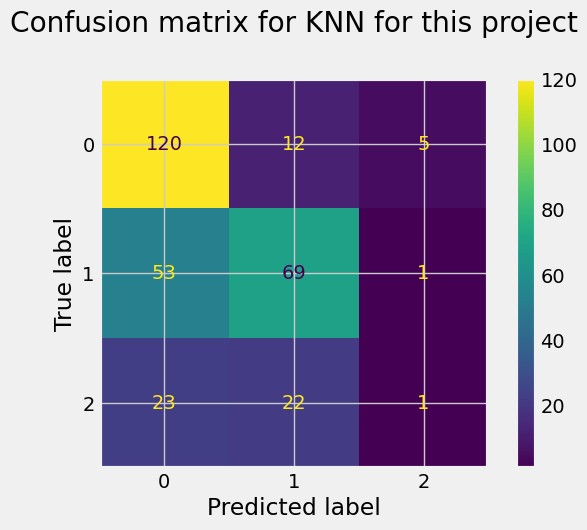

['knn_model.pkl']

In [435]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize KNN classifier with default parameters
knn = KNeighborsClassifier()

# Perform grid search over specified parameter values
param_grid = {'n_neighbors': range(1, 11)}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           cv=2, n_jobs=-3, verbose=2, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
predknn = best_knn.predict(X_test_scaled)

print("Classification Report for KNN Classifier for this project:")
print(classification_report(y_test, predknn))

# Plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y_test, predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for KNN for this project', y=1.1)
plt.show()

# Save the model
joblib.dump(best_knn, 'knn_model.pkl')


### XGBoost ###

In [466]:
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define xgb_clf if not already defined
xgb_clf = XGBClassifier(max_depth=1, min_samples_leaf=10,min_samples_split=5, random_state=64)
xgb_clf.fit(X_train, y_train_encoded)

y_pred_encoded = xgb_clf.predict(X_test)
y_pred = le.inverse_transform(y_pred_encoded)

print("Classification Report for XGBoost Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

        HIGH       0.71      0.88      0.79       137
INTERMEDIARY       0.72      0.74      0.73       123
         LOW       0.11      0.02      0.04        46

    accuracy                           0.70       306
   macro avg       0.51      0.55      0.52       306
weighted avg       0.62      0.70      0.65       306



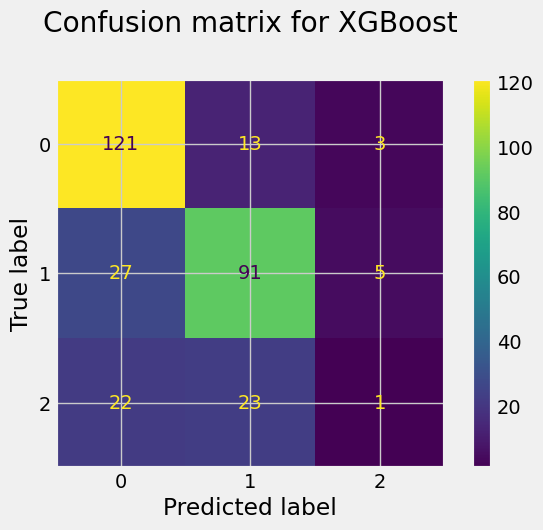

In [467]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Ensure y_test and y_pred are of the same type to avoid the ValueError
y_pred = xgb_clf.predict(X_test)
y_pred = le.inverse_transform(y_pred)  # Convert back to original labels for consistency

confusion_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
disp.plot()

plt.title('Confusion matrix for XGBoost', y=1.1)
plt.show()

In [468]:
joblib.dump(xgb_clf, 'xgb_model.pkl')


['xgb_model.pkl']